# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

Used the dataset called "fishing.csv" from Tidytuesday for my analysis

In [98]:
library('tidyverse')


In [99]:
fishing=read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-08/fishing.csv',
col_types=cols()) #fetches the 'fishing.csv' dataset from online repository and automatically infers the appropriate column types

fishing|>head()#Displaying the first few rows of the 'fishing' dataset

year,lake,species,grand_total,comments,region,values
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1991,Erie,American Eel,1,NA,Michigan (MI),0
1991,Erie,American Eel,1,NA,New York (NY),0
1991,Erie,American Eel,1,NA,Ohio (OH),0
1991,Erie,American Eel,1,NA,Pennsylvania (PA),0
1991,Erie,American Eel,1,NA,U.S. Total,0
1991,Erie,American Eel,1,NA,Canada (ONT),1



This code uses the 'fishing' dataset to create a bar plot showing the count of different species, filled by species type. The 'legend.position = "none"' part removes the legend from the plot, resulting in a visualization where species types are represented by different colors without a corresponding legend.

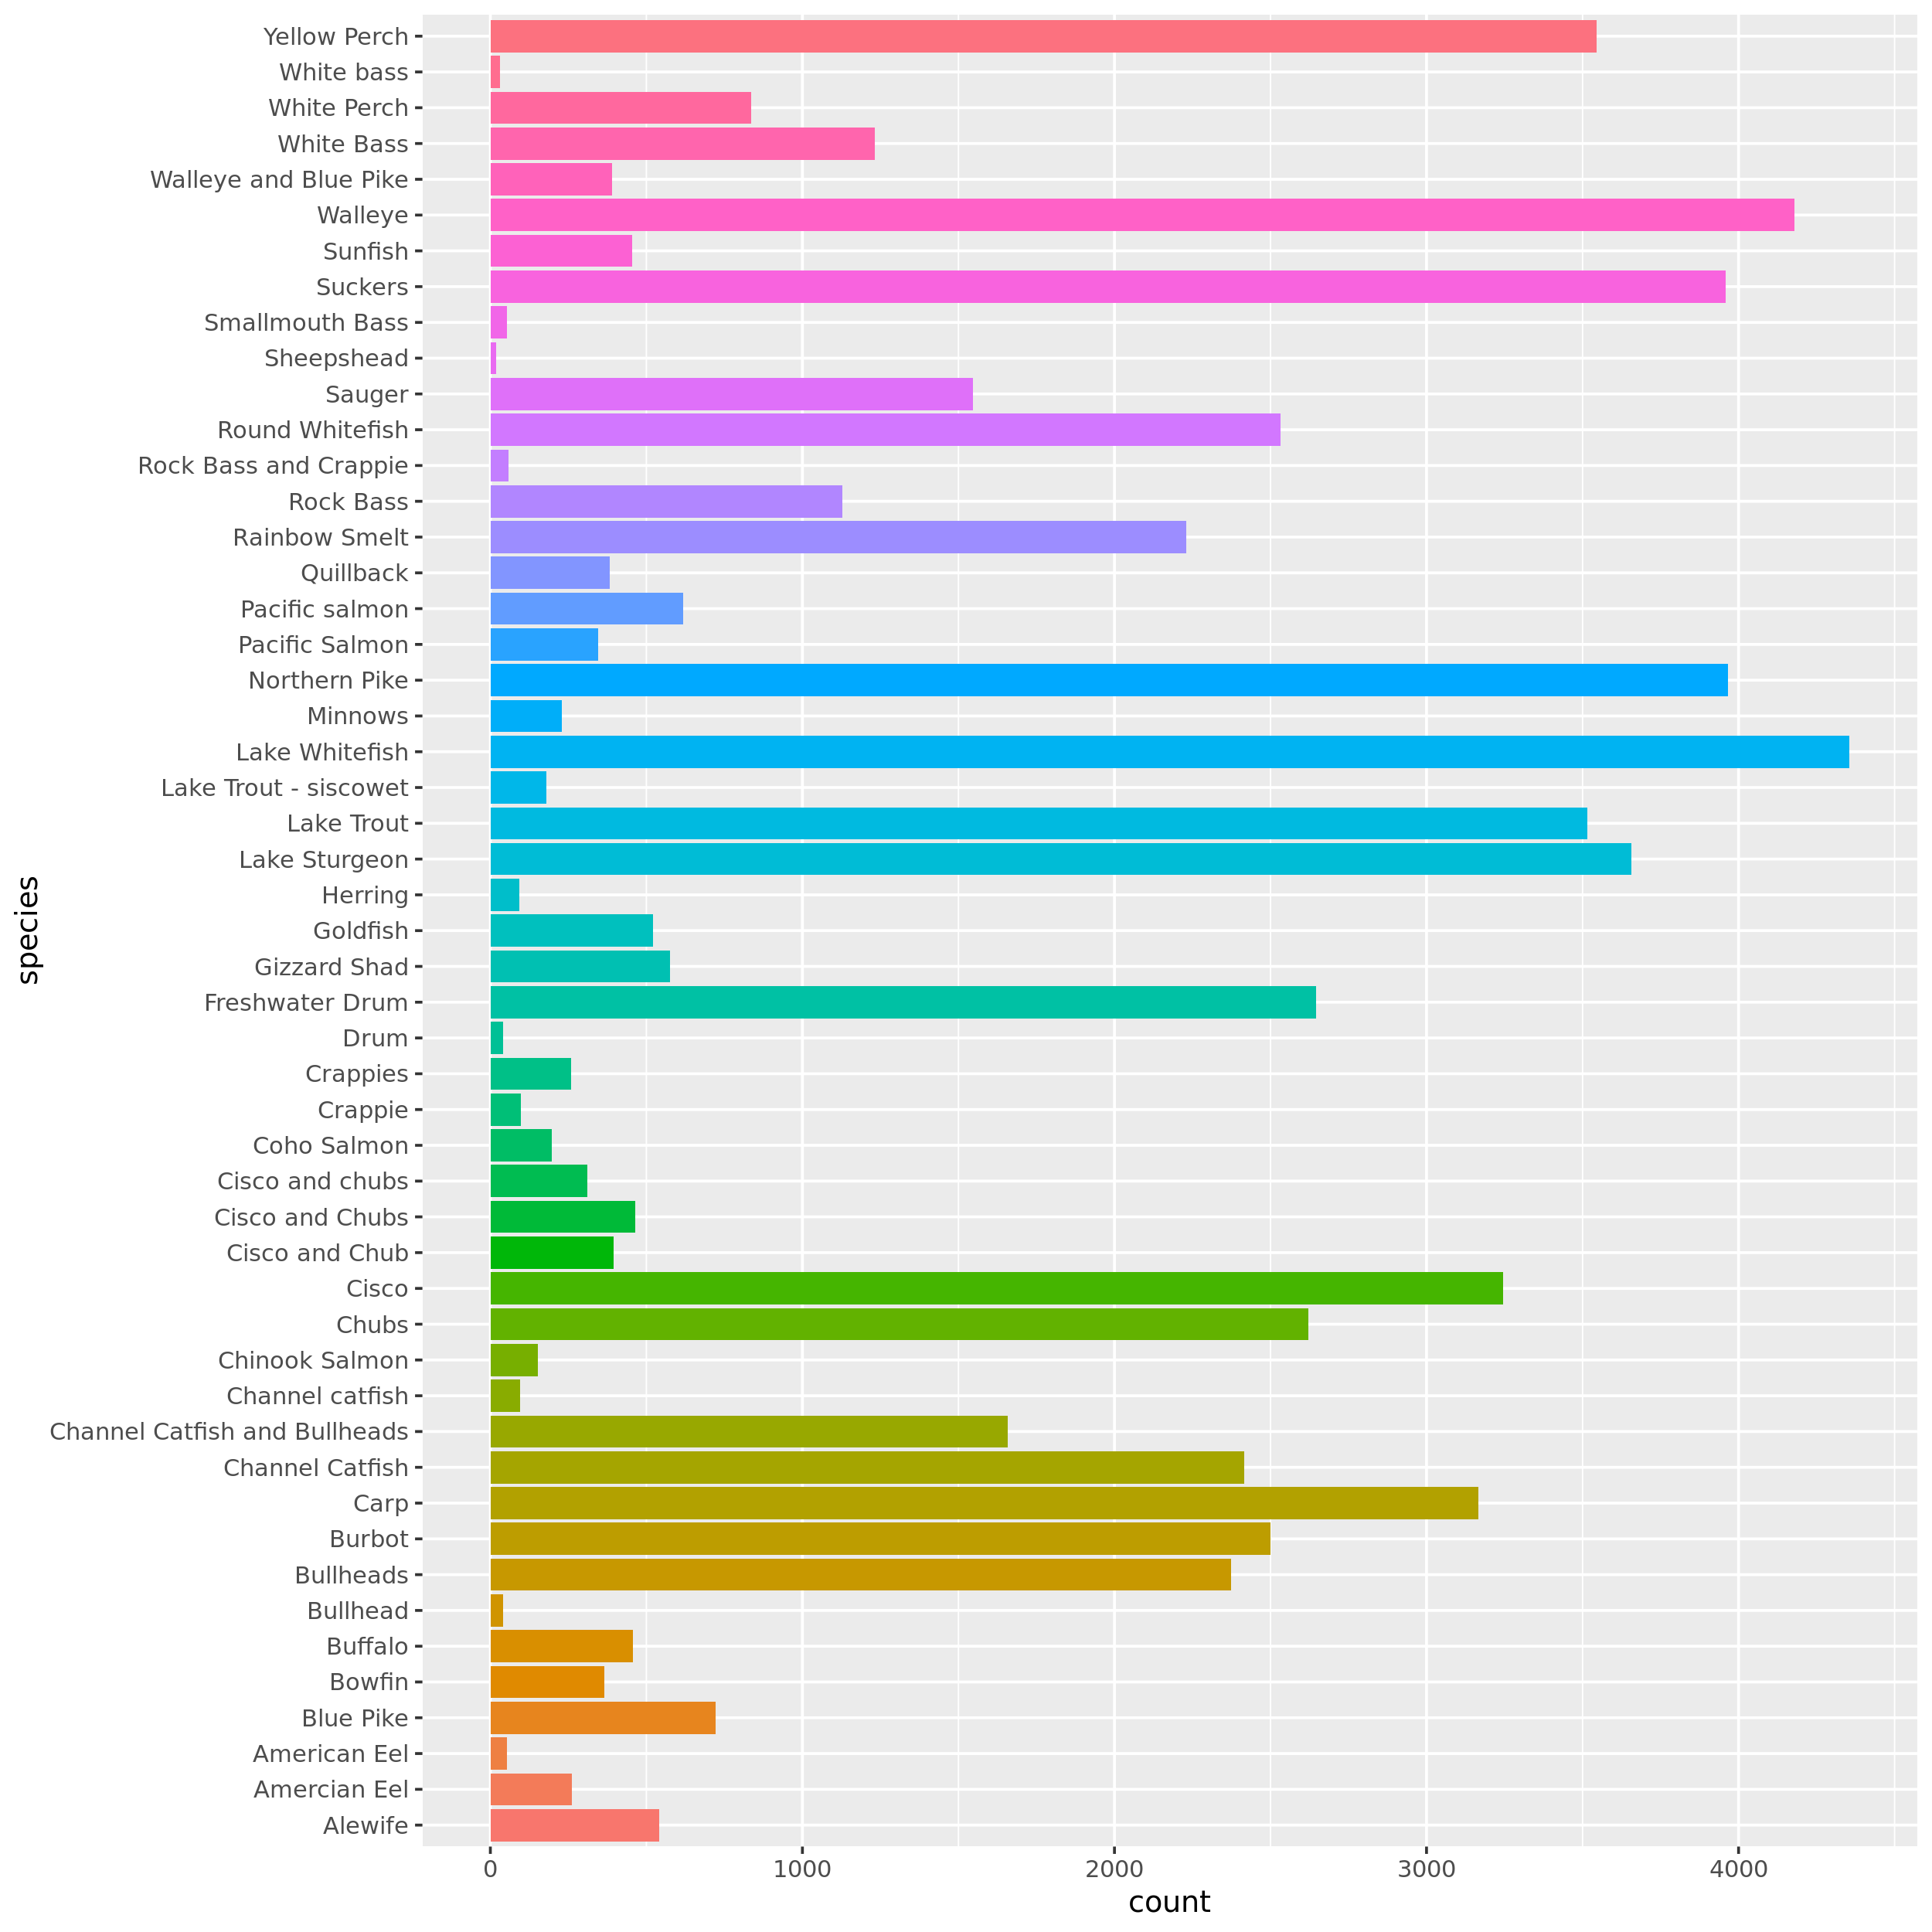

In [100]:
options(repr.plot.res=250, repr.plot.width=10, repr.plot.height=10)
p=ggplot(fishing,aes( y=species, fill=species))+geom_bar()+ #ggplot to generate a bar plot based on the 'fishing' dataset to display the count of occurrences for each unique 'species' entry on the y-axis, utilizing different fill colors for distinct species categories.
theme(legend.position = "none")#eliminates the legend from the plot, removing the area that usually denotes what each fill color represents.
p

In [101]:
fishing$region= fct_infreq(fishing$region)#reorders the levels in the 'region' factor variable according to the frequency of each region's appearance in the dataset. 
#The most frequent region will be assigned the first level, followed by the next most frequent, and so on.

In [102]:
fishing_grouped=fishing|>
group_by(region)|> #groups the dataset by the 'region' column
summarize(species_count=n())|> #Within each group, this calculates the count of species using the n() function and names the resulting column as 'species_count'.
ungroup()|>#This ungroups the dataset, removing the grouping structure
arrange(region)|> # arranges the rows of the dataset in ascending order based on the 'region' column
mutate(region=fct_infreq(region)|> #mutates the 'region' column by reordering its factor levels based on their frequency using fct_infreq() and then reversing the order using fct_rev()
fct_rev())
fishing_grouped#displays the first few rows of the resulting 'fishing_grouped' dataset

region,species_count
<fct>,<int>
Canada (ONT),7479
U.S. Total,6146
Michigan (MI),4020
U.S. Total (MI),3616
Georgian Bay (GB),2445
Huron Proper (HP),2445
North Channel (NC),2445
Total Canada (ONT),2445
U.S. Huron Proper (HP),2445


The below plot is created to visualize the distribution of species count across different regions based on the 'fishing_grouped' dataset. 
By representing the number of species observed in each region,
the plot offers insights into the comparative abundance or diversity of species among these areas.

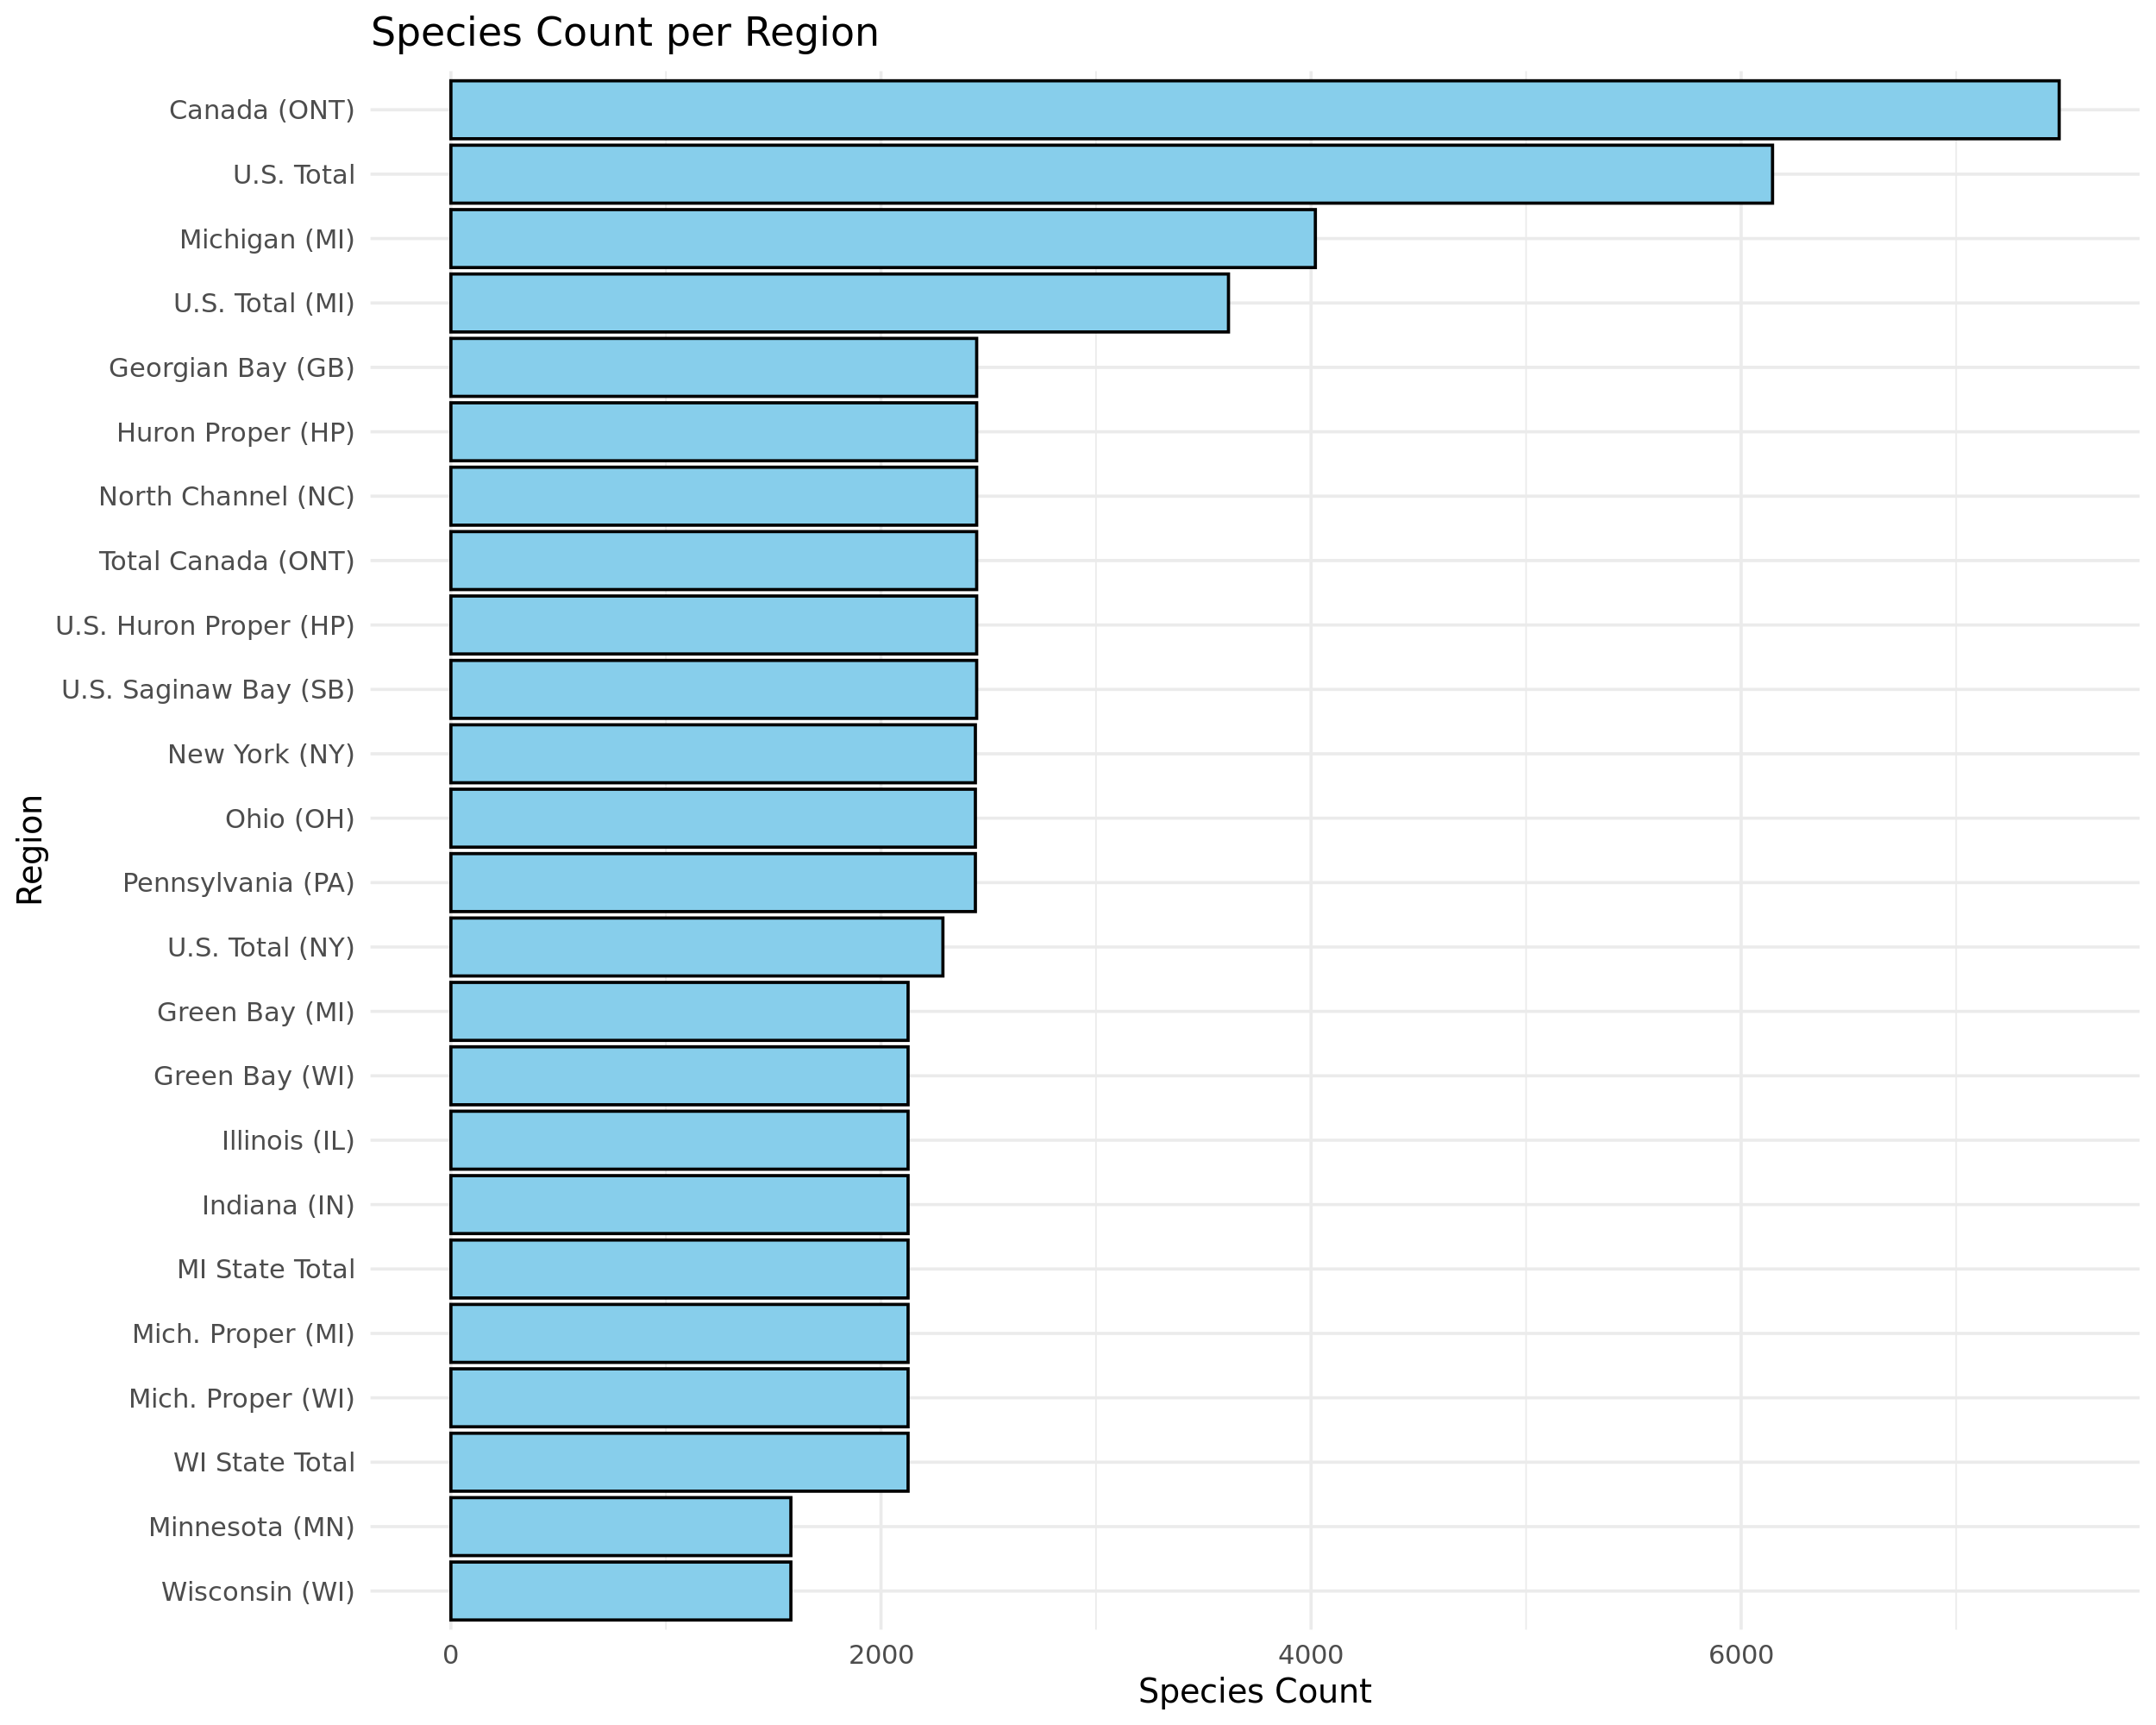

In [103]:
options(repr.plot.res=250,repr.plot.width=10, repr.plot.height=8)
p= ggplot(fishing_grouped, aes(y = region, x = species_count)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") + #Adds a bar geometry to the plot, specifying 'stat = "identity"' to use the 'species_count' values and the bars are filled with 'skyblue' color and outlined in 'black'.
  labs(title = "Species Count per Region", y = "Region", x = "Species Count") + #Sets the title of the plot 
  theme_minimal()#creating a simple and clean appearance without gridlines or unnecessary elements
p

The below visualization of boxplots and jittered points representing the 'grand_total' of observed data across different 'lake' names. 
The boxplots provide a summary of the distribution of observations per lake, showcasing the median, quartiles, and potential outliers. 
Overlaying jittered points on the boxplots helps visualize individual data points and their distribution within each 'lake'. 
This visualization aims to explore the variation in observed counts across different lakes and identify potential trends or differences between them.

Warning message:
“Removed 31767 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 31767 rows containing missing values (`geom_point()`).”


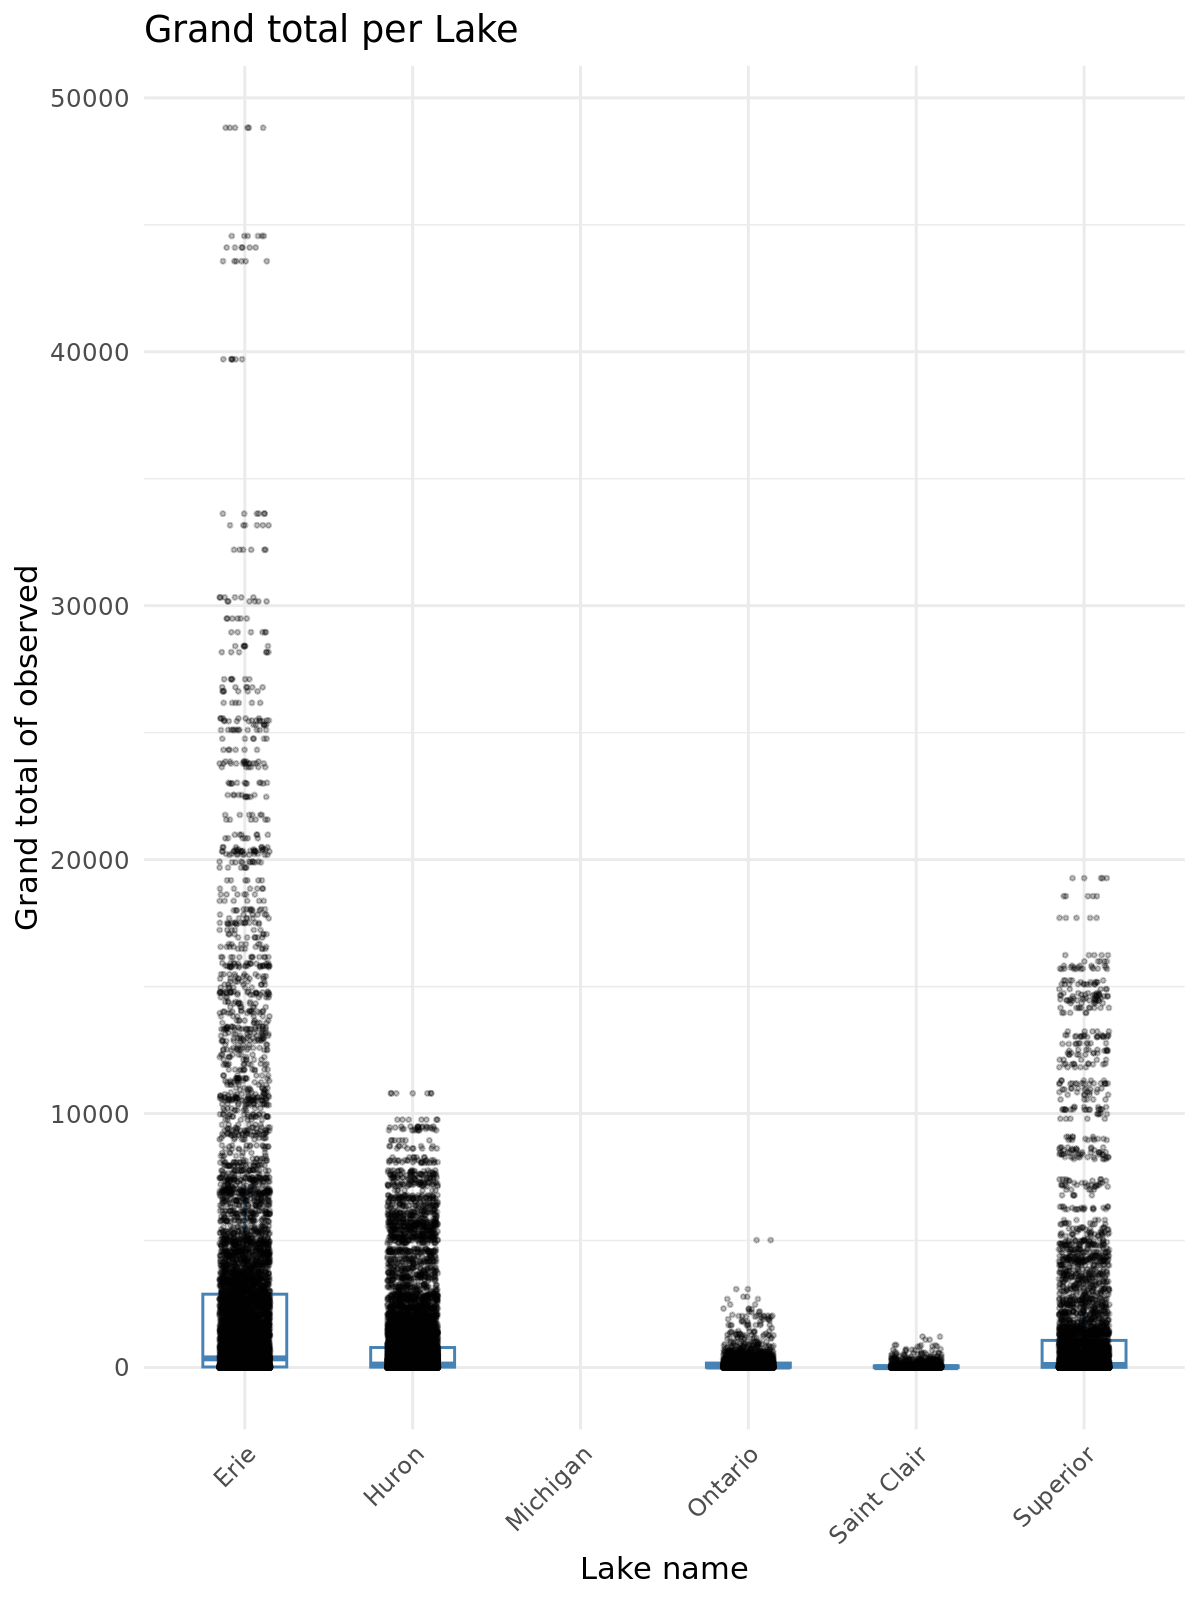

In [104]:
options(repr.plot.res=200,repr.plot.width=6, repr.plot.height=8)
p=ggplot(fishing, aes(x = lake, y = grand_total)) +
  geom_boxplot( fill=NA,outlier.shape=NA, color='steelblue', fatten=2, width=0.5)+
  geom_point(position=position_jitter(h = 0, w = 0.15), size = 0.50, alpha = 0.25)+ theme_minimal() +theme(axis.text.x=element_text(angle=45,hjust=1))+
  labs(x="Lake name", y='Grand total of observed', title = "Grand total per Lake")
p



This code generates a histogram showcasing the distribution of 'grand_total' values from the 'fishing' dataset using 20 bins. Additionally, rug plots overlaid on the histogram represent individual data points, with colors distinguishing data by 'lake' categories. The histogram offers an overview of 'grand_total' distribution patterns, while rug plots show specific data points positions and their densities across different lakes, aiding in outlier identification and understanding distribution differences among the lake categories.

Warning message in geom_rug(fishing = fishing, aes(x = grand_total, color = lake, :
“Ignoring unknown parameters: `fishing`”
Warning message in geom_rug(fishing = fishing, aes(x = grand_total, color = lake, :
“Ignoring unknown aesthetics: na.rm”


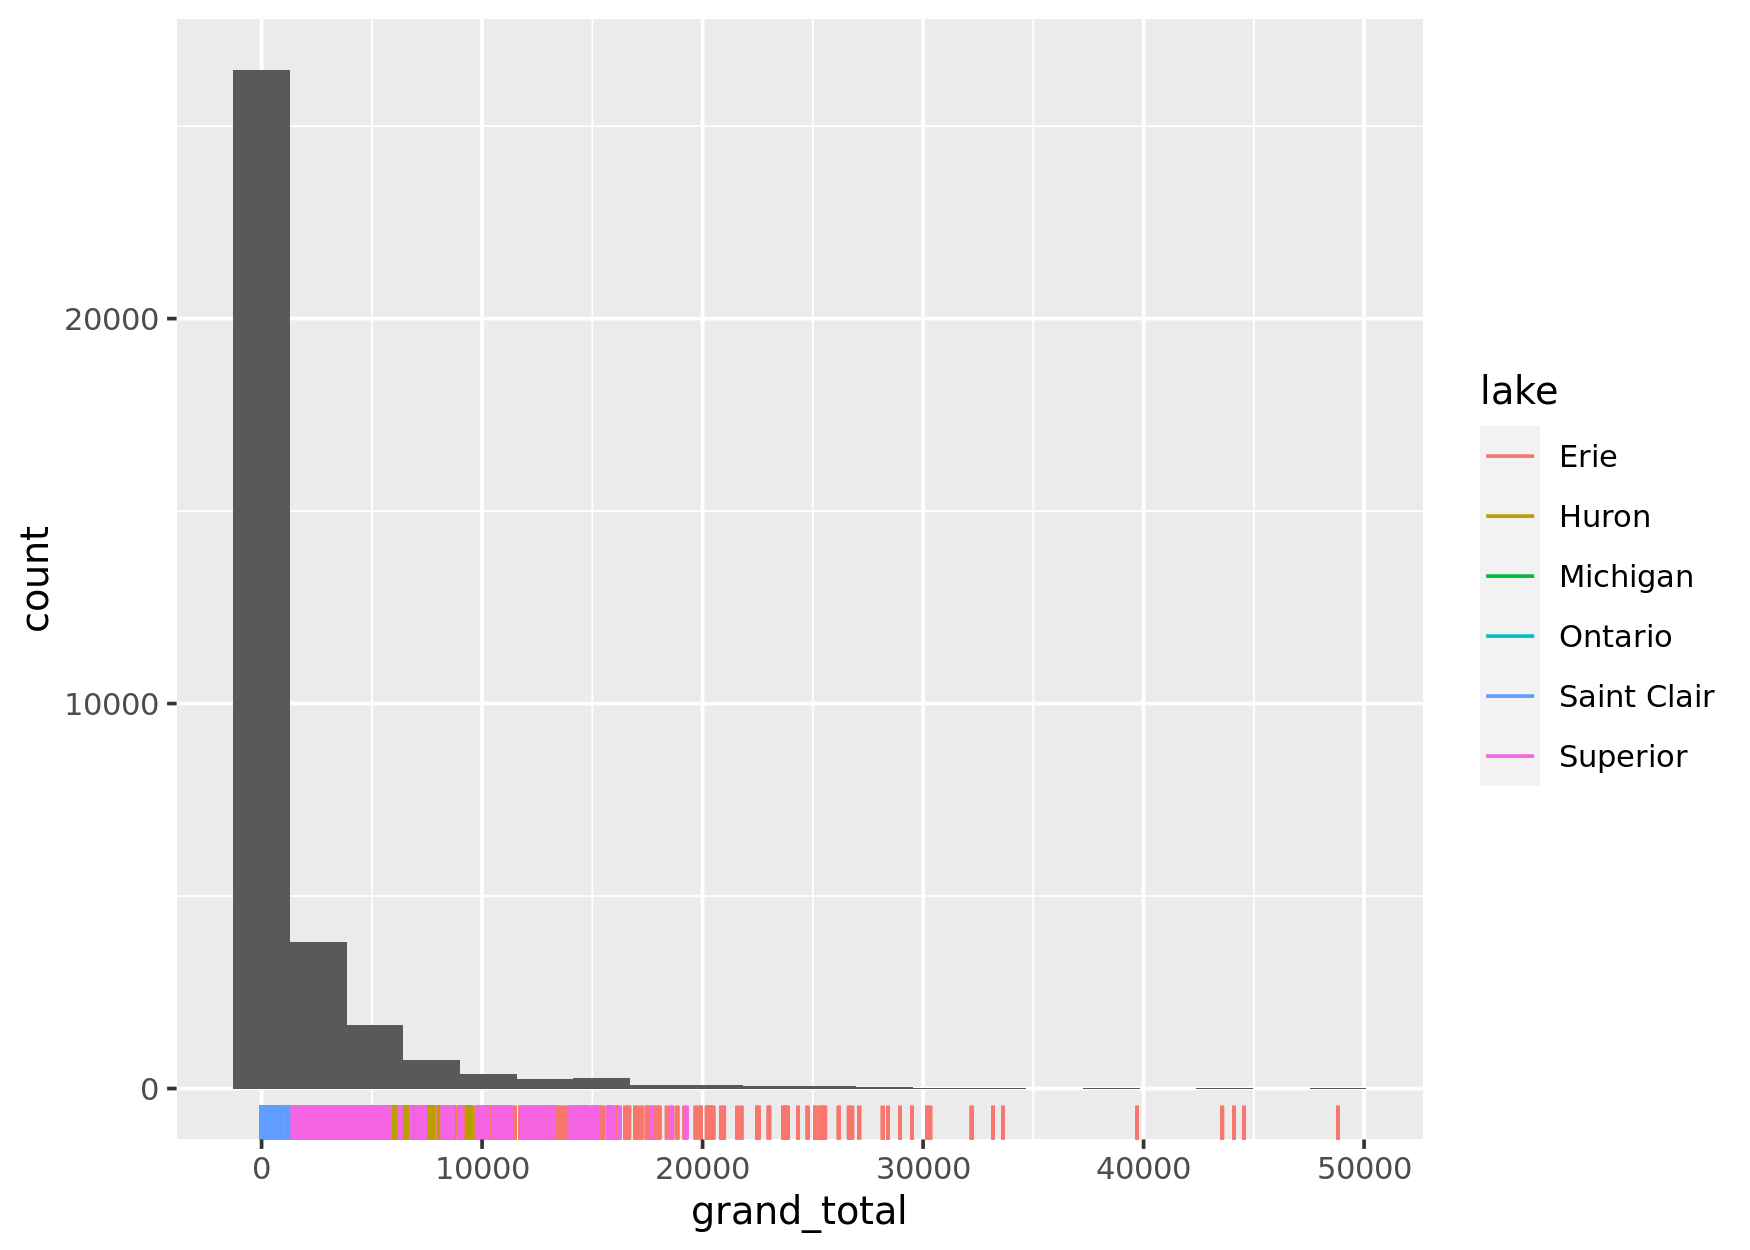

In [105]:
options(repr.plot.res=250,repr.plot.width=7, repr.plot.height=5)
p=ggplot(fishing, aes(x = grand_total)) +
geom_histogram(bins=20, na.rm=TRUE)+
geom_rug(fishing=fishing,aes(x=grand_total,color= lake, na.rm=TRUE))
p

This code generates a plot displaying the empirical cumulative distribution function using points ('stat_ecdf') for the 'values' variable from the 'fishing' dataset. 
Additionally, it overlays horizontal lines representing key percentiles (25th, 50th, and 75th) of the data distribution, providing a visual representation of these percentile values within the dataset. 
The different colored lines help distinguish and highlight the quartiles, aiding in understanding the spread and central tendency of the 'values' variable in the dataset.

Warning message:
“Removed 21916 rows containing non-finite values (`stat_ecdf()`).”


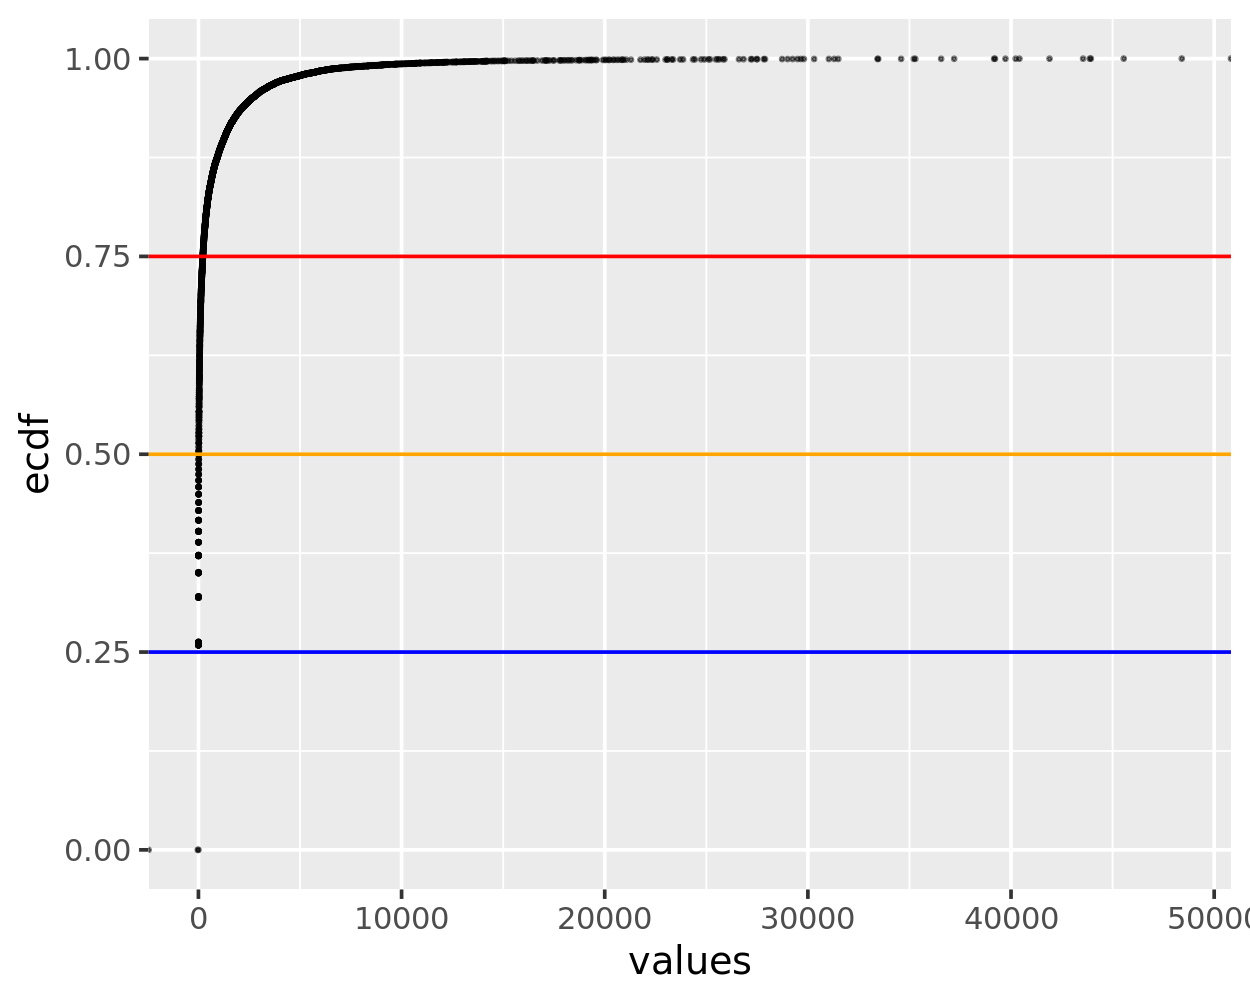

In [106]:
options(repr.plot.res=250,repr.plot.width=5, repr.plot.height=4)
p = ggplot(fishing, aes(x = values))

p = p + stat_ecdf(geom = "point", size = 0.25, alpha = 0.5)

p = p + geom_hline(aes(yintercept = 0.50), color = 'orange')
p = p + geom_hline(aes(yintercept = 0.25), color = 'blue')
p = p + geom_hline(aes(yintercept = 0.75), color = 'red')

p

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 